En este ejercicio se utiliza un LSTM autoencoder para buscar anomalias en unos sensores de vibraciones colocados en unos rodamientos

Primero importamos las librerias

In [1]:
#_________________TODO_______________________
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense #Steps for convolution in order


Using TensorFlow backend.


Importamos datos, y preprocesamos.

En vez de utilizar todos los datos de cada csv, calcularemos la media de cada sensor por archivo, y lo juntaremos en un único pandas dataframe, donde el index, será la fecha y la hora.

In [2]:
#https://pythonexamples.org/pandas-dataframe-read-csv-load-data-csv/

# load, average and merge sensor samples
data_dir = './data/2nd_test/'
merged_data = pd.DataFrame()
array_of_dates = []

for filename in os.listdir(data_dir):
  #_____________________TODO__________________________________________-
    #read CSV
    #calculate mean value of sensors
    temp = pd.read_csv(data_dir+filename, delimiter='\t', header=None)
    temp = temp.mean(axis=0)
    #append to "merged_data" and add index value date and time (you have that information in the filename)
    merged_data = merged_data.append(temp, ignore_index=True)
    array_of_dates.append(filename)

#I could not find an easy way of adding rows with dates as index, so... I created a column with dates
#Added it to the df and made it the index
#Spaghetti code, but it works
arr = np.array(array_of_dates)
index_dates = pd.DataFrame(data=arr.flatten())
merged_data = merged_data.join(index_dates, rsuffix='Date')
merged_data.set_index('0Date',inplace=True)

print(index_dates)    
print(merged_data)    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
print(merged_data)  

#transform data file index to datetime and sort in chronological order
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()


train = merged_data['2004-02-12 10:52:39': '2004-02-15 12:52:39']
test = merged_data['2004-02-15 12:52:39':]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)



                       0
0    2004.02.12.10.32.39
1    2004.02.12.10.42.39
2    2004.02.12.10.52.39
3    2004.02.12.11.02.39
4    2004.02.12.11.12.39
..                   ...
979  2004.02.19.05.42.39
980  2004.02.19.05.52.39
981  2004.02.19.06.02.39
982  2004.02.19.06.12.39
983  2004.02.19.06.22.39

[984 rows x 1 columns]
                            0         1         2         3
0Date                                                      
2004.02.12.10.32.39 -0.010196 -0.012695 -0.014541 -0.010026
2004.02.12.10.42.39 -0.002585 -0.002561 -0.002461 -0.003784
2004.02.12.10.52.39 -0.002484 -0.001695 -0.001595 -0.003485
2004.02.12.11.02.39 -0.002277 -0.002393 -0.003148 -0.003741
2004.02.12.11.12.39 -0.002404 -0.001559 -0.001158 -0.002703
...                       ...       ...       ...       ...
2004.02.19.05.42.39 -0.002752 -0.000838 -0.001911 -0.002939
2004.02.19.05.52.39 -0.004487 -0.000910 -0.001348 -0.003315
2004.02.19.06.02.39 -0.001703 -0.001632 -0.001365 -0.003311
2004.02.19.06.12

## Error and bypass

ValueError: time data '2004.02.12.16.52 (2).39' does not match format '%Y.%m.%d.%H.%M.%S' (match)
    

I changed the timestamp/filename for those files


Plot training and testing data 

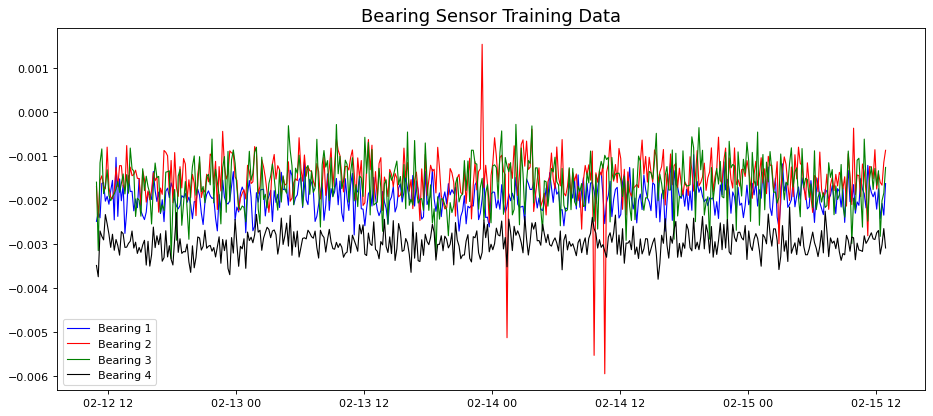

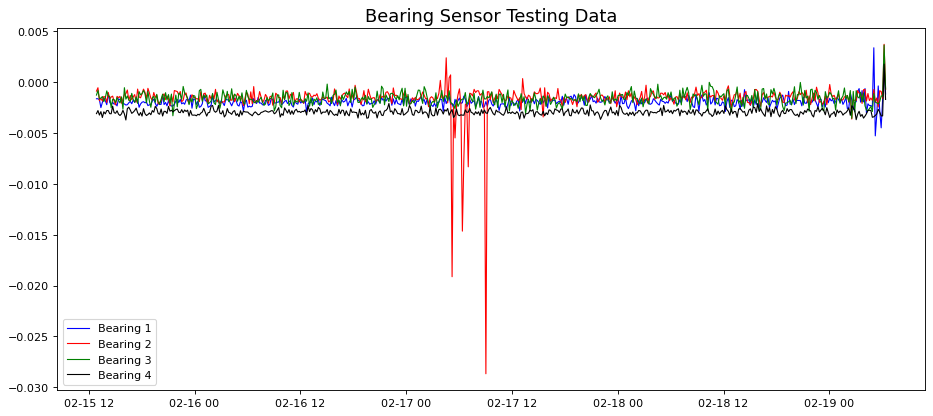

In [3]:



fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(train['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test['Bearing 1'], label='Bearing 1', color='blue', linewidth=1)
ax.plot(test['Bearing 2'], label='Bearing 2', color='red', linewidth=1)
ax.plot(test['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(test['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Testing Data', fontsize=16)
plt.show()



Scale with MinMaxScaler and reshape data to be tensor inputs for lstm

In [4]:
#_________TODO_________________
#minmaxscale
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)



In [5]:
# reshape inputs for LSTM [samples, timesteps, features]
print(train.shape)
print(test.shape)


(445, 4)
(538, 4)


In [6]:
#train = train.reshape((len(train), np.prod(train.shape[1:])))
#test = test.reshape((len(test), np.prod(test.shape[1:])))


# Reshaping [samples,timesteps,features]
# remember: samples: how many observations you have
#           timesteps: how long does the rnn remember
#           features: how many variables
train=np.reshape(train, (447, 4, 1))
test=np.reshape(test, (540, 4, 1))

ValueError: cannot reshape array of size 1780 into shape (447,4,1)

In [ ]:
print(train.shape)
print(test.shape)

Define Autoencoder model (LSTM autoencoder)
compile and fit

In [ ]:
#Don't add from tensorflow.keras with keras, they are incompatible
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input #Steps for convolution in order
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed
from keras.models import Model

# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,)(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

#_________TODO________________ compile, and fit
autoencoder = autoencoder_model(train)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

history = autoencoder.fit(train, train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(test, test))

Plot loss history

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()





```
# This is formatted as code
```

Predict Train

In [ ]:
#make the prediction of Xtrain values
#_______TODO_____________
X_pred=autoencoder.predict(train)

Calculate the MAE loss in training phase and set threshold

In [ ]:
LossMAE = np.mean(np.abs(X_pred-train), axis = 1)
thres=LossMAE.mean()+3*LossMAE.std()
print(thres)



calculate the loss on the test set

In [ ]:
#Make prediction of Xtest, and calculate the loss MAE of the test set
#________TODO__________________-
test_pred=autoencoder.predict(test)
LossMAE = np.mean(np.abs(test_pred-test), axis = 1)
thres=LossMAE.mean()+3*LossMAE.std()
print(thres)

Plot, train MAE losses, threshold and TestMAE looses

In [ ]:
#____________TODO__________________-
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()